<a href="https://colab.research.google.com/github/thinnarat007/python_dataviz2024/blob/main/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import Library

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/for_work/basic_python'

In [ ]:
titanic_file_path= os.path.join(path,'titanic.csv')
print(titanic_file_path )

/content/drive/MyDrive/for_work/basic_python/titanic.csv


In [ ]:
titanic = pd.read_csv(titanic_file_path)
titanic
#SibSp คือ จำนวนพี่น้องกับจำนวนคู่สมรสที่อยู่บนเรือ
#Parch คือ จำนวนพ่อแม่กับจำนวนลูกที่อยู่บนเรือ
#Fare คือ ค่าโดยสาร
#cabin คือ หมายเลขห้อง
#Embarked คือจุดหมายปลายทาง

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Prepare Data

In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##แทนค่าว่างของอายุด้วยค่าเฉลี่ย

In [ ]:
# เติมค่าที่หายไปใน 'age' ด้วยอายุเฉลี่ย
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


<ipython-input-226-e83700b4aaef>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





##แทนค่าว่างใน embarked ด้วยคำที่พบบ่อยสุด

In [ ]:
# เติมค่าที่หายไปใน 'embarked' ด้วยค่าที่พบบ่อยที่สุด
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

<ipython-input-227-bb9490a909fc>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





##เติมค่าว่างใน Cabin ด้วย unknow

In [ ]:
titanic['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-228-dfe5b4fd3251>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


##

##เพิ่มคอลัมน์ FamilySize
ใช้เก็บค่าของจำนวนพี่น้อง และคู่สมรส ที่อยู่บนเรือด้วยกัน

In [ ]:
#สร้างตัวแปร FamilySize ซึ่งเป็นผลรวมของตัวแปร SibSp (number of siblings/spouses aboard) และ Parch (number of parents/children aboard)
# Create a new column 'FamilySize' by adding 'sibsp' and 'parch' columns.
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0


In [ ]:
# prompt: #สร้างตัวแปร IsAlone ซึ่งมีค่าเป็น alone ถ้า FamilySize เป็น 0 , และมีค่าเป็น not alone เมื่อมีค่าเป็นตัวเลขอื่น

import numpy as np
titanic['IsAlone'] = np.where(titanic['FamilySize'] == 0, 'Alone', 'Not Alone')

In [ ]:
titanic['IsAlone'].value_counts()

,count
IsAlone,
Alone,537
Not Alone,354


##เพิ่มคอลัมน์ AgeGroup
ที่ระบุกลุ่มอายุของตัวอย่าง โดยแบ่งเป็นกลุ่มดังนี้ [0, 12), [12, 18), [18, 50) และ [50, 100)

In [ ]:
#สร้างตัวแปร AgeGroup ที่ระบุกลุ่มอายุของตัวอย่าง โดยแบ่งเป็นกลุ่มดังนี้ [0, 12), [12, 18), [18, 50) และ [50, 100)

# Define a function to categorize age into groups
def age_group(age):
  if age < 13:
    return "[0, 13)"
  elif age < 20:
    return "[13, 20)"
  elif age < 40:
    return "[20, 40)"
  elif age < 60:
    return "[40, 60)"
  elif age < 100:
    return "[60,100)"

# Apply the function to create the AgeGroup column
titanic['AgeGroup'] = titanic['Age'].apply(age_group)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)"


##เพิ่มคอลัมน์ Label_age_group
โดยเป็นการระบุว่าในช่วงอายุต่างๆอยู่ในวัยไหน
  * อายุต่ำกว่า 13 ปี ระบุเป็น Child (วัยเด็ก)
  * อายุ 13-19 เป็น Teenager (วัยรุ่น)
  * อายุ 20-39 เป็น Working (วัยทำงาน)
  * อายุ 40-59 เป็น Adult (วัยกลางคน)
  * อายุ 60 ปีขึ้นไป เป็น Elderly (วัยชรา)


In [ ]:
# แทนที่ช่วงอายุด้วยชื่อกลุ่มอายุ
AgeGroup_mapping = {
    '[0, 13)': 'Child',
    '[13, 20)': 'Teenager',
    '[20, 40)': 'Working',
    '[40, 60)': 'Adult',
    '[60,100)': 'Elderly'
}

titanic['Label_age_group'] = titanic['AgeGroup'].map(AgeGroup_mapping)


In [ ]:
titanic['Label_age_group'].value_counts()

,count
Label_age_group,
Working,564
Adult,137
Teenager,95
Child,69
Elderly,26


##เปลี่ยนจาก 0 และ 1 เป็นเสียชีวิต ไม่เสียชีวิต

In [ ]:
# prompt: ##เปลี่ยนจาก 0 และ 1 เป็นเสียชีวิต ไม่เสียชีวิต ภาษาอังกฤษ

titanic['Survived'] = titanic['Survived'].map({0: 'Died', 1: 'Survived'})
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working


In [ ]:
titanic['Group_Ticket'] = titanic['Ticket'].map(titanic['Ticket'].value_counts())
titanic['Group_Ticket'].value_counts()

,count
Group_Ticket,
1,547
2,188
3,63
4,44
7,21
6,18
5,10


In [ ]:
titanic.to_csv('titanic_cleaned1.csv',index=False)

#For correlation dashbord

In [ ]:
df=titanic.copy()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working,1
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working,1
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working,1
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working,2
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working,1


In [ ]:
from scipy.stats import pearsonr

# ทดสอบความสัมพันธ์เชิงเส้นระหว่าง Age และ Fare
pearson_corr, pearson_p_value = pearsonr(df['Age'], df['Fare'])

# แสดงผลค่า correlation และ p-value
print(f"Pearson Correlation: {round(pearson_corr, 2)}")
print(f"P-value: {pearson_p_value}")



Pearson Correlation: 0.09
P-value: 0.006235676128303316


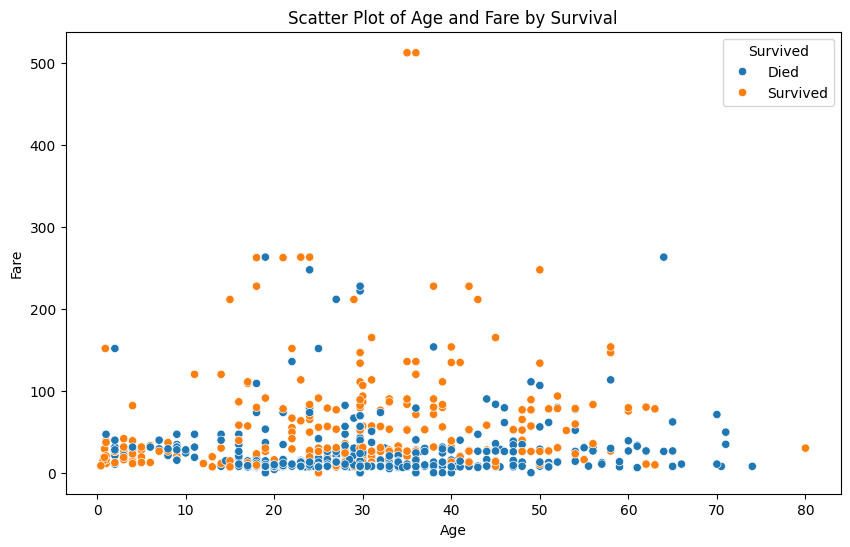

In [ ]:
# prompt: สร้างกราฟเพื่อดูการกระจายของอายุและค่าโดยสาร ว่าตายหรือไม่ตาย

import matplotlib.pyplot as plt
import seaborn as sns

# สร้าง scatter plot ของอายุและค่าโดยสาร โดยแบ่งสีตามการรอดชีวิต
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.title('Scatter Plot of Age and Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


In [ ]:
# คำนวณ Spearman Correlation และ p-value
spearman_corr, spearman_p_value = spearmanr(df['Age'], df['Fare'])
# แสดงผลลัพธ์
print(f"Spearman Correlation: {round(spearman_corr, 2)}")
print(f"P-value: {round(spearman_p_value, 4)}")

Spearman Correlation: 0.12
P-value: 0.0004


In [ ]:
df_unique_ticket.to_csv('df_unique_ticket.csv',index=False)

#Data Visulization

##Object 1.เพือศึกษาเกี่ยวกับการรอดและไม่รอดชีวิตของผู้โดยสาร

###กราฟที่ 1 pie chart แสดงสัดส่วนของผู้โดยสารที่รอดและไม่รอดชีวิต

In [ ]:
import matplotlib.pyplot as plt

# นับจำนวนผู้รอดชีวิตและผู้เสียชีวิต
survived_counts = titanic['Survived'].value_counts()

# สร้าง pie chart โดยให้ autopct แสดงทั้งเปอร์เซ็นต์และจำนวน และกำหนดสี
colors = ['#9400D3', '#9370DB']
plt.pie(survived_counts, labels=['Died', 'Survived'], colors=colors,
        autopct=lambda p: f'{p:.1f}% ({int(p * sum(survived_counts) / 100)})', startangle=90)

plt.axis('equal')  # ทำให้ pie chart เป็นวงกลม
plt.title('Number of survivors and dead on board')
plt.show()

### กราฟที่  2 grouped bar chart แสดงจำนวนการรอดและไม่รอดชีวิตระหว่างเพศชายและหญิง

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# แสดงรายงานการรอดชีวิตตามเพศ
survived_by_sex = titanic.groupby(['Survived', 'Sex'])['Sex'].count().unstack()
print(survived_by_sex)

# แสดงแผนภูมิแท่งเพื่อเปรียบเทียบอัตราการรอดชีวิตตามเพศ พร้อมแสดงจำนวน
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survived', hue='Sex', data=titanic, palette=['#9400D3', '#9370DB'])
plt.title('Number of Survivors and Non-Survivors by Sex')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.legend(['Male', 'Female'], title='Sex')

# เพิ่มจำนวนบนแท่ง
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # ตรวจสอบไม่ให้แสดงค่า 0
        ax.annotate(f'{int(height)}',  # แสดงจำนวน
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()


### กราฟที่ 3 stacked bar chart แสดงจำนวนการอดและไม่รอดชีวิตระหว่างกลุ่มอายุ

In [ ]:
import altair as alt

# สร้าง stacked bar chart พร้อมแกนและขนาดกราฟที่กำหนดเอง
chart = alt.Chart(titanic).mark_bar(size=150).encode(  # กำหนดความกว้างของแท่งกราฟผ่าน size
    x=alt.X('Survived', title='Survived'),
    y=alt.Y('count()', title='Count'),
    color=alt.Color('Label_age_group', title='Age',
                    scale=alt.Scale(range=['#4B0082', '#6A5ACD', '#7B68EE', '#9370DB', '#BA55D3'])),  # ใช้โทนสีม่วงน้ำเงิน
    order=alt.Order('Label_age_group', sort='ascending')
).properties(
    title='Survival Rate by Age Group',
    width=500,  # กำหนดความกว้างของกราฟ
    height=400  # กำหนดความสูงของกราฟ
)

chart


##Object 2 การศึกษาปัจจัยที่มีผลต่ออัตราการรอดชีวิตของผู้โดยสารไททานิก:

### กราฟที่ 1 barchart แสดงอัตราการอดชีวิตระหว่างกลุ่มอายุ

In [ ]:
import altair as alt

# คำนวณอัตราการรอดชีวิตในแต่ละช่วงอายุ
survival_rate_by_age_and_sex = titanic.groupby('Label_age_group').agg(
    total=('Survived', 'size'),  # นับจำนวนทั้งหมดในแต่ละกลุ่มอายุ
    survived=('Survived', lambda x: (x == 'Survived').sum())  # นับจำนวนผู้รอดชีวิต
).reset_index()

# เพิ่มคอลัมน์อัตราการรอดชีวิต (Survival Rate)
survival_rate_by_age_and_sex['survival_rate'] = (survival_rate_by_age_and_sex['survived'] / survival_rate_by_age_and_sex['total']) * 100

# สร้าง bar chart แสดงอัตราการรอดชีวิตของแต่ละช่วงอายุ พร้อมโทนสีม่วง
chart = alt.Chart(survival_rate_by_age_and_sex).mark_bar().encode(
    x=alt.X('Label_age_group:N', title='กลุ่มอายุ'),  # ใช้ Label_age_group และตั้งชื่อ
    y=alt.Y('survival_rate:Q', title='อัตราการรอดชีวิต (%)'),  # ตั้งชื่อแกน y
    color=alt.Color('Label_age_group:N', title='กลุ่มอายุ',
                    scale=alt.Scale(range=['#4B0082', '#6A5ACD', '#9370DB', '#BA55D3', '#DDA0DD'])),  # ใช้โทนสีม่วง
).properties(
    width=600,  # กำหนดความกว้างของกราฟ
    height=400  # กำหนดความสูงของกราฟ
)

chart.display()


###  กราฟที่ 2 bar chart แสดงอัตราการรอดชีวิตระหว่างเพศ

In [ ]:
import altair as alt

# คำนวณอัตราการรอดชีวิตในแต่ละเพศ
survival_rate_by_sex = titanic.groupby('Sex').agg(
    total=('Survived', 'size'),  # นับจำนวนทั้งหมดในแต่ละเพศ
    survived=('Survived', lambda x: (x == 'Survived').sum())  # นับจำนวนผู้รอดชีวิต
).reset_index()

# เพิ่มคอลัมน์อัตราการรอดชีวิต (Survival Rate)
survival_rate_by_sex['survival_rate'] = (survival_rate_by_sex['survived'] / survival_rate_by_sex['total']) * 100

# สร้าง bar chart แสดงอัตราการรอดชีวิตของแต่ละเพศ พร้อมโทนสีม่วง
chart = alt.Chart(survival_rate_by_sex).mark_bar().encode(
    x=alt.X('Sex:N', title='เพศ'),  # ใช้เพศเพื่อเป็นแกน x
    y=alt.Y('survival_rate:Q', title='อัตราการรอดชีวิต (%)'),  # ตั้งชื่อแกน y
    color=alt.Color('Sex:N', title='เพศ',
                    scale=alt.Scale(domain=[ 'male','female'], range=['#9400D3', '#9370DB'])),  # ใช้สีม่วงสำหรับชาย และสีม่วงอ่อนสำหรับหญิง
).properties(
    width=600,  # กำหนดความกว้างของกราฟ
    height=400  # กำหนดความสูงของกราฟ
)

# แสดงกราฟ
chart.display()


### กราฟที่ 3 bar chart แสดงอัตราการรอดชีวิตระหว่างชั้นโดยสาร

In [ ]:
import altair as alt

# คำนวณอัตราการรอดชีวิตในแต่ละ Pclass
survival_rate_by_class = titanic.groupby('Pclass').agg(
    total=('Survived', 'size'),  # นับจำนวนทั้งหมดในแต่ละชั้นโดยสาร
    survived=('Survived', lambda x: (x == 'Survived').sum())  # นับจำนวนผู้รอดชีวิต
).reset_index()

# เพิ่มคอลัมน์อัตราการรอดชีวิต (Survival Rate)
survival_rate_by_class['survival_rate'] = (survival_rate_by_class['survived'] / survival_rate_by_class['total']) * 100

# สร้าง bar chart แสดงอัตราการรอดชีวิตของแต่ละ Pclass พร้อมโทนสีม่วง
chart = alt.Chart(survival_rate_by_class).mark_bar().encode(
    x=alt.X('Pclass:N', title='ชั้นโดยสาร (Pclass)'),  # ใช้ Pclass เป็นแกน x
    y=alt.Y('survival_rate:Q', title='อัตราการรอดชีวิต (%)'),  # ตั้งชื่อแกน y
    color=alt.Color('Pclass:N', title='ชั้น',
                    scale=alt.Scale(domain=[1, 2, 3], range=['#800080', '#DA70D6', '#BA55D3'])),  # ใช้สีม่วงสำหรับ Pclass 1, 2, 3
).properties(
    width=600,  # กำหนดความกว้างของกราฟ
    height=400  # กำหนดความสูงของกราฟ
)

# แสดงกราฟ
chart.display()


###  กราฟที่ 4 bar chart แสดงอัตราการรอดชีวิตระหว่างมาคนเดียวกับมีครอบครัว

In [ ]:
# คำนวณอัตราการรอดชีวิต
survival_rate_by_alone = titanic.groupby('IsAlone').agg(
    total=('Survived', 'size'),  # นับจำนวนทั้งหมดในแต่ละกลุ่ม
    survived=('Survived', lambda x: (x == 'Survived').sum())  # นับจำนวนผู้รอดชีวิต
).reset_index()

# เพิ่มคอลัมน์อัตราการรอดชีวิต (Survival Rate)
survival_rate_by_alone['survival_rate'] = (survival_rate_by_alone['survived'] / survival_rate_by_alone['total']) * 100

import altair as alt

# สร้าง bar chart แสดงอัตราการรอดชีวิต
chart = alt.Chart(survival_rate_by_alone).mark_bar().encode(
    x=alt.X('IsAlone:N', title='สถานะการเดินทาง'),  # ใช้ IsAlone เป็นแกน x
    y=alt.Y('survival_rate:Q', title='อัตราการรอดชีวิต (%)'),  # ตั้งชื่อแกน y
    color=alt.Color('IsAlone:N', title='สถานะการเดินทาง', scale=alt.Scale(range=['#9400D3', '#9370DB']))  # สีโทนม่วง
).properties(
    width=600,  # กำหนดความกว้างของกราฟ
    height=400  # กำหนดความสูงของกราฟ
)

# แสดงกราฟ
chart.display()

In [ ]:
!pip install plotly
import plotly.express as px

##Object 3 เพื่อวิเคราะห์และเปรียบเทียบปัจจัยที่มีผลต่อการรอดชีวิตของผู้โดยสาร

###Histogram ของค่าโดยสาร (Fare):

การใช้ฮิสโตแกรมแสดงการกระจายตัวของค่าโดยสารอาจช่วยให้เห็นว่าผู้โดยสารที่จ่ายค่าโดยสารสูงหรือต่ำมีโอกาสรอดชีวิตอย่างไรบ้าง

In [ ]:

# สร้าง histogram ของค่าโดยสาร (Fare)
hist_fare = alt.Chart(titanic).mark_bar().encode(
    alt.X('Fare:Q', bin=alt.Bin(maxbins=30), title='ค่าโดยสาร (Fare)'),  # การแบ่งช่วงของค่าโดยสาร
    y=alt.Y('count()', title='จำนวนผู้โดยสาร'),  # จำนวนผู้โดยสารในแต่ละช่วง
    color=alt.Color('Survived:N', title='รอดชีวิต', scale=alt.Scale(range=['#9400D3', '#9370DB']))
).properties(
    title='การกระจายตัวของค่าโดยสารและอัตราการรอดชีวิต',  # ชื่อกราฟ
    width=600,  # กำหนดความกว้างของกราฟ
    height=400  # กำหนดความสูงของกราฟ
)

# แสดงกราฟ
hist_fare.display()


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/p

alt.Chart(...)

###stacked bar chart แสดงอัตราการอดชีวิตของผู้โดยสารแต่ละชั้นโดยสารระหว่างเพศ

In [ ]:
import pandas as pd
import altair as alt

# สมมติว่าข้อมูล titanic มีคอลัมน์ 'Pclass', 'Survived' และ 'Sex' อยู่แล้ว
# คำนวณอัตราการรอดชีวิตในแต่ละชั้นและเพศ
survival_rate_by_class_sex = titanic.groupby(['Pclass', 'Sex']).agg(
    total=('Survived', 'size'),
    survived=('Survived',lambda x: (x == 'Survived').sum())  # นับจำนวนผู้รอดชีวิต
).reset_index()

# เพิ่มคอลัมน์อัตราการรอดชีวิต (Survival Rate)
survival_rate_by_class_sex['survival_rate'] = (survival_rate_by_class_sex['survived'] / survival_rate_by_class_sex['total']) * 100

# สร้าง bar chart แสดงอัตราการรอดชีวิตของแต่ละเพศในแต่ละชั้น
chart = alt.Chart(survival_rate_by_class_sex).mark_bar().encode(
    x=alt.X('Pclass:N', title='Passenger Class'),  # แกน X เป็นชั้นของผู้โดยสาร
    y=alt.Y('survival_rate:Q', title='Survival Rate (%)'),  # แกน Y เป็นอัตราการรอดชีวิต
    color=alt.Color('Sex:N', title='Sex', scale=alt.Scale(range=[ '#9370DB','#9400D3'])),
    tooltip=['Pclass:N', 'Sex:N', 'survival_rate:Q']  # แสดงข้อมูลเมื่อเอาเมาส์ชี้
).properties(
    title='Survival Rate by Passenger Class and Sex' , # ตั้งชื่อกราฟ
    width=600,  # กำหนดความกว้างของกราฟ
    height=400  # กำหนดความสูงของกราฟ
)

chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

###Scatter Plot ของค่าโดยสาร (Fare) และอายุ (Age) กับการรอดชีวิต:

การสร้าง scatter plot ของค่าโดยสารและอายุกับการรอดชีวิตจะช่วยให้เห็นว่ามีความสัมพันธ์ระหว่างสองตัวแปรนี้กับอัตราการรอดชีวิตหรือไม่

In [ ]:
import altair as alt

# สร้าง Scatter Plot
scatter_plot = alt.Chart(titanic).mark_circle(size=60).encode(
    y=alt.Y('Fare:Q', title='ค่าโดยสาร (Fare)'),  # Changed alt.y to alt.Y
    x=alt.X('Age:Q', title='อายุ (Age)'),  # Changed alt.x to alt.X
    color=alt.Color('Survived:N', title='การรอดชีวิต', scale=alt.Scale(range=['red', 'green'])),  # ใช้สีเพื่อแสดงการรอดชีวิต
    tooltip=['Fare', 'Age', 'Survived']  # แสดง tooltip เมื่อชี้ที่จุด
).properties(
    title='Scatter Plot ของค่าโดยสารและอายุกับการรอดชีวิต'
)

scatter_plot

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/p

alt.Chart(...)

####เปลี่ยนสี

In [ ]:
import altair as alt

# สร้าง Scatter Plot
scatter_plot = alt.Chart(titanic).mark_circle(size=60).encode(
    y=alt.Y('Fare:Q', title='ค่าโดยสาร (Fare)'),  # เปลี่ยนเป็น alt.Y
    x=alt.X('Age:Q', title='อายุ (Age)'),  # เปลี่ยนเป็น alt.X
    color=alt.Color('Survived:N', title='การรอดชีวิต', scale=alt.Scale(range=['#E1B7E3', '#9B59B6'])),  # ใช้โทนสีม่วง
    tooltip=['Fare', 'Age', 'Survived']  # แสดง tooltip เมื่อชี้ที่จุด
).properties(
    title='Scatter Plot ของค่าโดยสารและอายุกับการรอดชีวิต'
)

scatter_plot


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/p

alt.Chart(...)

##Object 4 วิเคราะห์หาความสัมพันธ์ระหว่างตัวแปรต่างๆ ที่มีอิทธิพลต่อการรอดชีวิตของผู้โดยสาร Titanic

###heatmap

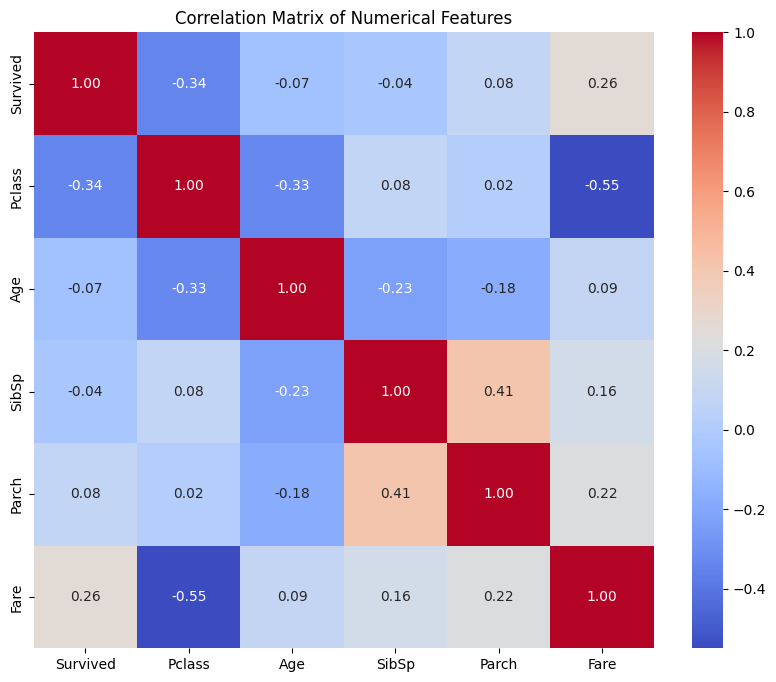

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'titanic' is your DataFrame containing the Titanic dataset
# If not, replace 'titanic' with the actual name of your DataFrame

# Convert 'Survived' to numerical values for correlation analysis
titanic['Survived'] = titanic['Survived'].map({'Died': 0, 'Survived': 1})

# Select numerical features for correlation analysis
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = titanic[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# prompt: หาค่าสถิติ spearman_correlation

import pandas as pd
import numpy as np

# Assuming 'titanic' is your DataFrame containing the Titanic dataset
# If not, replace 'titanic' with the actual name of your DataFrame


# Select numerical features for correlation analysis
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Calculate Spearman correlation
spearman_correlation = titanic[numerical_features].corr(method='spearman')

print(spearman_correlation)


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.339668 -0.039109  0.088879  0.138266  0.323736
Pclass   -0.339668  1.000000 -0.308875 -0.043019 -0.022801 -0.688032
Age      -0.039109 -0.308875  1.000000 -0.147035 -0.217290  0.118847
SibSp     0.088879 -0.043019 -0.147035  1.000000  0.450014  0.447113
Parch     0.138266 -0.022801 -0.217290  0.450014  1.000000  0.410074
Fare      0.323736 -0.688032  0.118847  0.447113  0.410074  1.000000


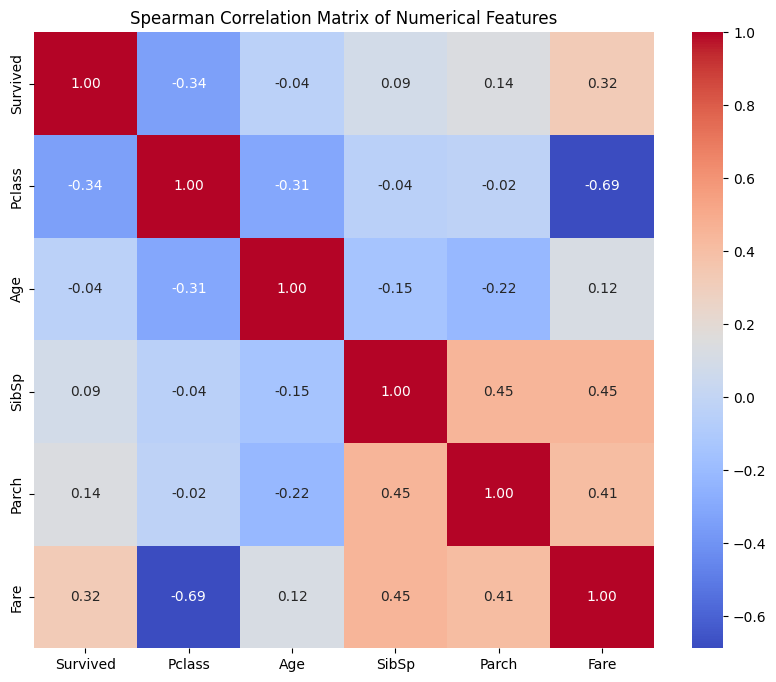

In [ ]:
# prompt: สร้าง heatmap spearman_correlation

import matplotlib.pyplot as plt
import seaborn as sns

# สร้าง Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
print(titanic['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


#For Correlation

In [ ]:
survival_corr=titanic.copy()
survival_corr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working,1
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working,1
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working,1
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working,2
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working,1


In [ ]:
survived_by_sex=df.groupby(['Survived','Sex'])['Sex'].count().unstack()
survived_by_sex

Sex,female,male
Survived,,
Died,81,468
Survived,233,109


In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency
# chi2_contingency returns four values: chi2 statistic, p-value, degrees of freedom, and expected frequencies
# We need to unpack all four values
chi_square_corr1, chi_square_p_value, dof, expected = chi2_contingency(survived_by_sex)
print(f'Chi-Square: {round(chi_square_corr1,4)}')
print(f'P-value: {round(chi_square_p_value,4)}')
print(f'Degrees of Freedom: {dof}') # Print degrees of freedom
print(f'Expected Frequencies: \n{expected}') # Print expected frequencies

Chi-Square: 260.717
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies: 
[[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


##data viz for overveiw

In [ ]:
from matplotlib import pyplot as plt

###Pie Chart แสดงสัดส่วนผู้รอดชีวิตและเสียชีวิตบนเรือ

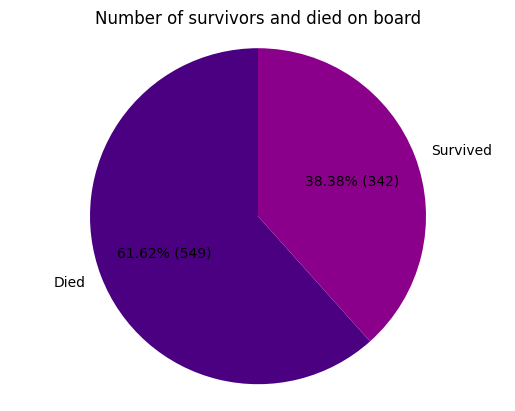

In [ ]:
# นับจำนวนผู้รอดชีวิตและผู้เสียชีวิต
survived_counts = titanic['Survived'].value_counts()

# สร้าง pie chart โดยให้ autopct แสดงทั้งเปอร์เซ็นต์และจำนวน
plt.pie(survived_counts, labels=['Died', 'Survived'], autopct=lambda p: f'{p:.2f}% ({int(p * sum(survived_counts) / 100)})', startangle=90,colors=['#4B0082','#8B008B'])

plt.axis('equal')  # ทำให้ pie chart เป็นวงกลม
plt.title('Number of survivors and died on board')
plt.show()

###grouped bar chart แสดงจำนวนการรอดและไม่รอดชีวิตระหว่างเพศชายและหญิง

Sex       female  male
Survived              
Died          81   468
Survived     233   109


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



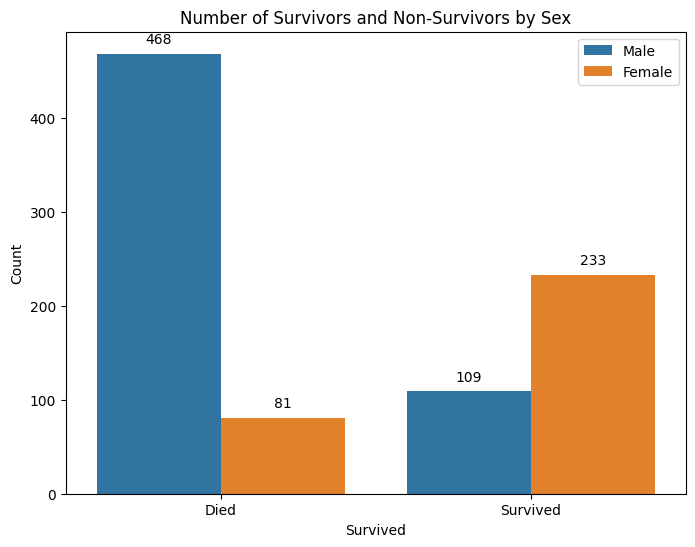

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# แสดงรายงานการรอดชีวิตตามเพศ
survived_by_sex = titanic.groupby(['Survived', 'Sex'])['Sex'].count().unstack()
print(survived_by_sex)

# แสดงแผนภูมิแท่งเพื่อเปรียบเทียบอัตราการรอดชีวิตตามเพศ พร้อมแสดงจำนวน
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Number of Survivors and Non-Survivors by Sex')
plt.ylabel('Count')
plt.legend(['Male', 'Female'])

# เพิ่มจำนวนบนแท่ง
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # ตรวจสอบไม่ให้แสดงค่า 0
        ax.annotate(f'{int(height)}',  # แสดงจำนวน
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')



plt.show()


#data viz for correlation

In [ ]:
import altair as alt

# สร้าง Scatter Plot
scatter_plot = alt.Chart(titanic).mark_circle(size=80).encode(
    x=alt.X('Fare:Q', title='ค่าโดยสาร (Fare)'),
    y=alt.Y('Age:Q', title='อายุ (Age)'),
    color=alt.Color('Survived:N', title='การรอดชีวิต', scale=alt.Scale(range=['red', 'green'])),  # ใช้สีเพื่อแสดงการรอดชีวิต
    tooltip=['Fare', 'Age', 'Survived']  # แสดง tooltip เมื่อชี้ที่จุด
).properties(
    title='Scatter Plot ของค่าโดยสารและอายุกับการรอดชีวิต'
)

scatter_plot


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/p

alt.Chart(...)

In [ ]:
import altair as alt

# สร้าง Scatter Plot
scatter_plot = alt.Chart(titanic).mark_circle(size=80).encode(
    x=alt.X('Age:Q', title='อายุ (Age)'),
    y=alt.Y('Fare:Q', title='ค่าโดยสาร (Fare)'),
    color=alt.Color('Survived:N', title='การรอดชีวิต', scale=alt.Scale(range=['red', 'green'])),  # ใช้สีเพื่อแสดงการรอดชีวิต
    tooltip=['Fare', 'Age', 'Survived']  # แสดง tooltip เมื่อชี้ที่จุด
).properties(
    title='Scatter Plot ของค่าโดยสารและอายุกับการรอดชีวิต'
)

scatter_plot


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/usr/local/lib/p

alt.Chart(...)

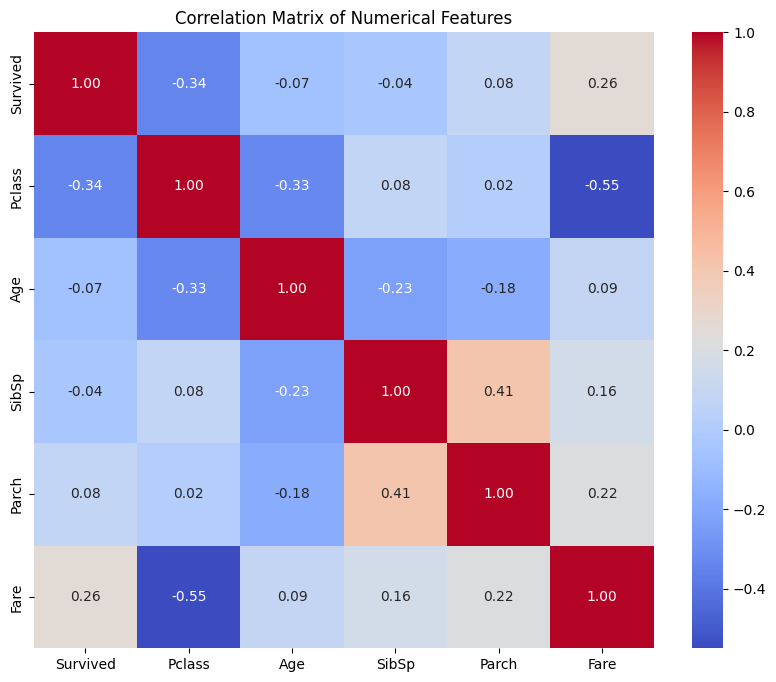

In [ ]:
# prompt: สร้าง Heatmap ดูความสัมพันธ์ของการเสียชีวิตกัยตัวแปรต่างๆ

import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Survived' to numerical values for correlation analysis
survival_corr['Survived'] = survival_corr['Survived'].map({'Died': 0, 'Survived': 1})

# Select numerical features for correlation analysis
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = survival_corr[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
correlation_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

In [ ]:
survival_corr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'AgeGroup', 'Label_age_group', 'Group_Ticket'],
      dtype='object')

In [ ]:
survival_corr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working,1


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'AgeGroup', 'Label_age_group', 'Group_Ticket'],
      dtype='object')

In [ ]:
# เลือกคอลัมน์ที่สำคัญสำหรับการวิเคราะห์
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
df_selected = df[selected_columns]

In [ ]:
df_selected['Sex'] = df_selected['Sex'].astype('category')
df_selected['Pclass'] = df_selected['Pclass'].astype('category')


<ipython-input-262-c3162f77429f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-262-c3162f77429f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# สร้างตารางความถี่ระหว่าง Survived กับ Pclass
contingency_table = pd.crosstab(titanic['Survived'], titanic['Pclass'])

# ใช้ chi2_contingency เพื่อทดสอบความสัมพันธ์
print(f'Chi-Squre')
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p, dof, expected


Chi-Squre


(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

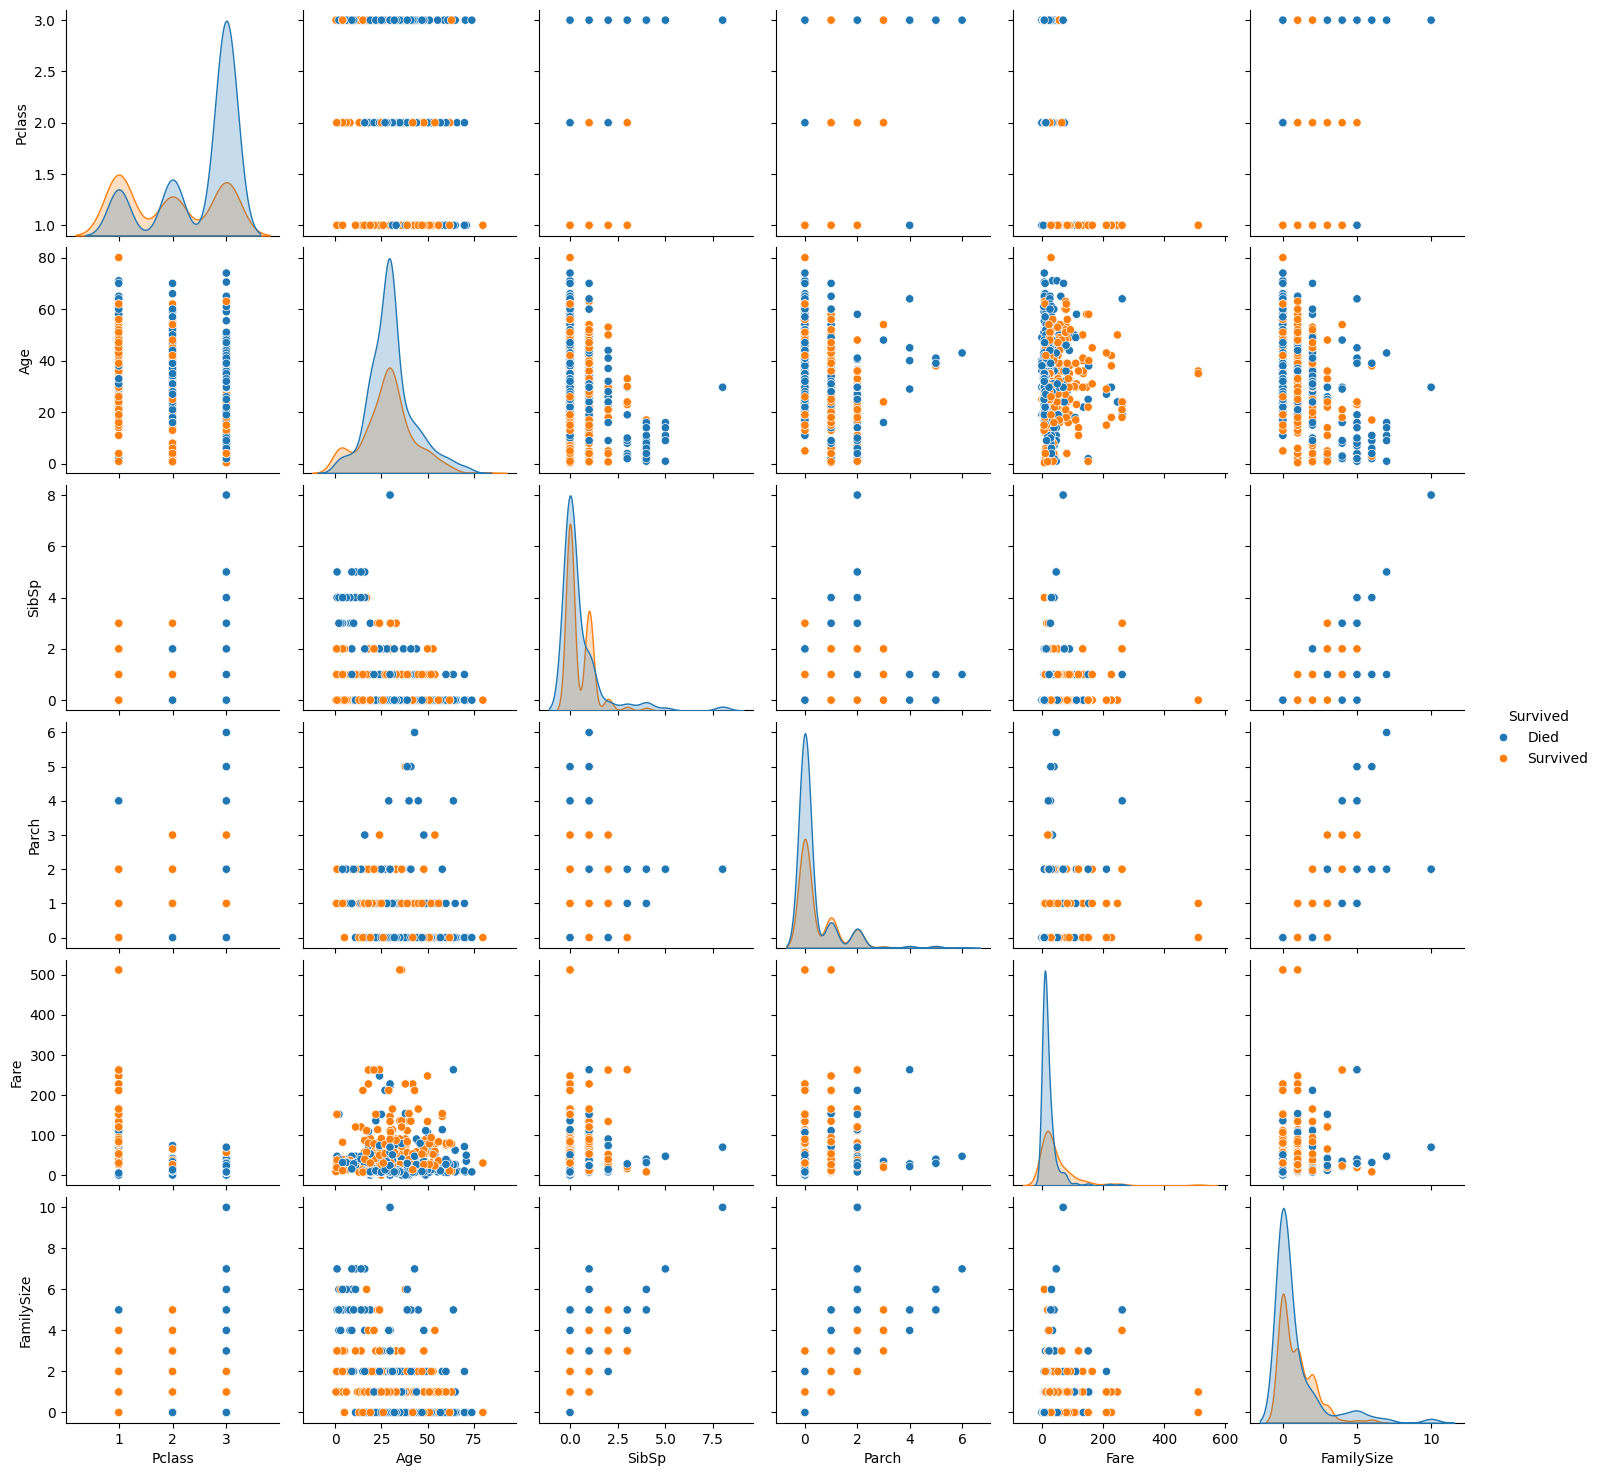

In [ ]:
# ใช้ seaborn เพื่อสร้าง pairplot
sns.pairplot(titanic, hue='Survived', vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize'])
plt.show()



###8. Box Plot with Violin Overlay
เพื่อแสดงการกระจายของอายุในแต่ละกลุ่มที่รอดชีวิตและไม่รอดชีวิต
ประโยชน์: ให้ข้อมูลเชิงลึกเกี่ยวกับการกระจายและความหนาแน่นของอายุในแต่ละกลุ่ม

<ipython-input-265-249d184fee0c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



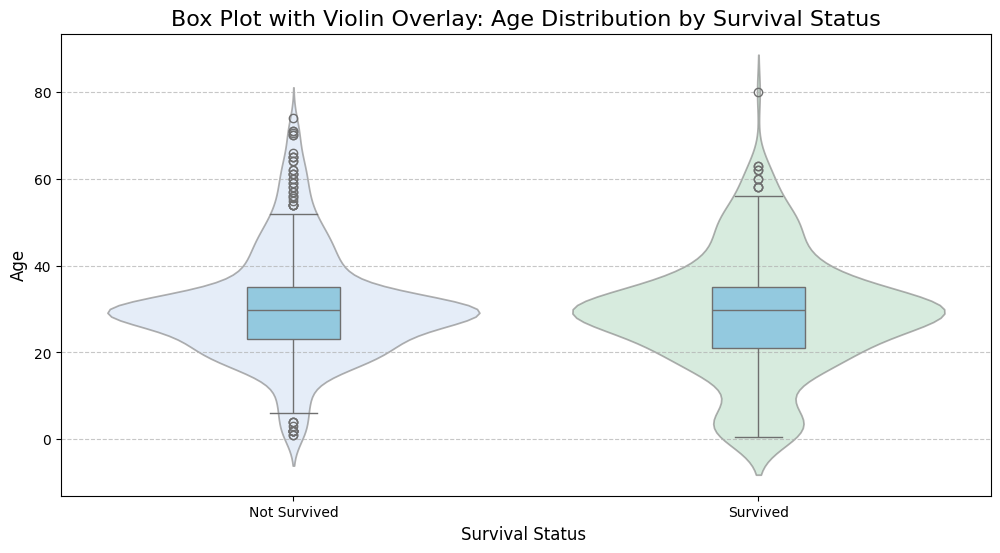

In [ ]:
# สร้าง Box Plot และ Violin Plot
plt.figure(figsize=(12, 6))

# สร้าง Violin Plot
sns.violinplot(x='Survived', y='Age', data=titanic, inner=None,
               palette=["#D0E1F9", "#B8E3C8"], alpha=0.6)  # สีของ Violin Plot

# สร้าง Box Plot
sns.boxplot(x='Survived', y='Age', data=titanic, color='skyblue', width=0.2)  # สีของ Box Plot

# ปรับแต่งกราฟ
plt.title('Box Plot with Violin Overlay: Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Survival Status ', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#prepare data for correlation

In [ ]:
corr_df=titanic.copy()
corr_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working,1
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working,1
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working,1
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working,2
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working,1


In [ ]:
# แทนที่ค่าที่ไม่ถูกต้องในคอลัมน์ 'Survived'
corr_df['Survived'] = corr_df['Survived'].replace({'Survived': 1, 'Died': 0})


<ipython-input-267-24422446df5e>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
corr_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working,1


In [ ]:
# สร้าง DataFrame สำหรับอัตราการอยู่รอดตามเพศ
survival_sex = corr_df.groupby('Sex')['Survived'].mean().reset_index()

In [ ]:
# ปรับชื่อคอลัมน์
survival_sex.columns = ['Sex', 'Survival Rate']

In [ ]:
print(survival_sex)

      Sex  Survival Rate
0  female       0.742038
1    male       0.188908


In [ ]:
corr_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'AgeGroup', 'Label_age_group', 'Group_Ticket'],
      dtype='object')

In [ ]:
# คำนวณอัตราการอยู่รอดตามกลุ่มอายุ
survival_age = corr_df.groupby('AgeGroup')['Survived'].mean().reset_index()
survival_age.columns = ['Age Group', 'Survival Rate']

# แสดงผลลัพธ์
print(survival_age)

  Age Group  Survival Rate
0   [0, 13)       0.579710
1  [13, 20)       0.410526
2  [20, 40)       0.358156
3  [40, 60)       0.394161
4  [60,100)       0.269231


In [ ]:
# คำนวณอัตราการอยู่รอดตามชั้นโดยสาร
survival_pclass = corr_df.groupby('Pclass')['Survived'].mean().reset_index()
survival_pclass.columns = ['Pclass', 'Survival Rate']

# แสดงผลลัพธ์
print(survival_pclass)


   Pclass  Survival Rate
0       1       0.629630
1       2       0.472826
2       3       0.242363


In [ ]:
# คำนวณอัตราการอยู่รอดตามขนาดของครอบครัว
survival_family_size = corr_df.groupby('FamilySize')['Survived'].mean().reset_index()
survival_family_size.columns = ['Family Size', 'Survival Rate']

# แสดงผลลัพธ์
print(survival_family_size)


   Family Size  Survival Rate
0            0       0.303538
1            1       0.552795
2            2       0.578431
3            3       0.724138
4            4       0.200000
5            5       0.136364
6            6       0.333333
7            7       0.000000
8           10       0.000000


In [ ]:
# คำนวณอัตราการอยู่รอดตามที่โดยสาร
survival_embarked = corr_df.groupby('Embarked')['Survived'].mean().reset_index()
survival_embarked.columns = ['Embarked', 'Survival Rate']

# แสดงผลลัพธ์
print(survival_embarked)


  Embarked  Survival Rate
0        C       0.553571
1        Q       0.389610
2        S       0.339009


In [ ]:
from scipy.stats import chi2_contingency

# สร้างตารางการข้าม (Contingency Table) สำหรับเพศและการอยู่รอด
contingency_table_sex = pd.crosstab(corr_df['Sex'], corr_df['Survived'])

# ทำการทดสอบ Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table_sex)

print("Chi-Square Test for Sex and Survival:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

# สร้างตารางการข้ามสำหรับ Pclass และการอยู่รอด
contingency_table_pclass = pd.crosstab(corr_df['Pclass'], corr_df['Survived'])

# ทำการทดสอบ Chi-Square
chi2_pclass, p_pclass, dof_pclass, expected_pclass = chi2_contingency(contingency_table_pclass)

print("\nChi-Square Test for Pclass and Survival:")
print("Chi2 Statistic:", chi2_pclass)
print("p-value:", p_pclass)


Chi-Square Test for Sex and Survival:
Chi2 Statistic: 260.71702016732104
p-value: 1.1973570627755645e-58

Chi-Square Test for Pclass and Survival:
Chi2 Statistic: 102.88898875696056
p-value: 4.549251711298793e-23


In [ ]:
from scipy.stats import f_oneway

# แยกอัตราการอยู่รอดตามขนาดของครอบครัว
family_sizes = survival_family_size['Family Size'].tolist()
survival_rates = survival_family_size['Survival Rate'].tolist()

# ทำการทดสอบ ANOVA
f_statistic, p_value = f_oneway(family_sizes, survival_rates)

print("\nANOVA Test for Family Size and Survival Rate:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)



ANOVA Test for Family Size and Survival Rate:
F-statistic: 13.728799472233348
p-value: 0.0019209931946822204


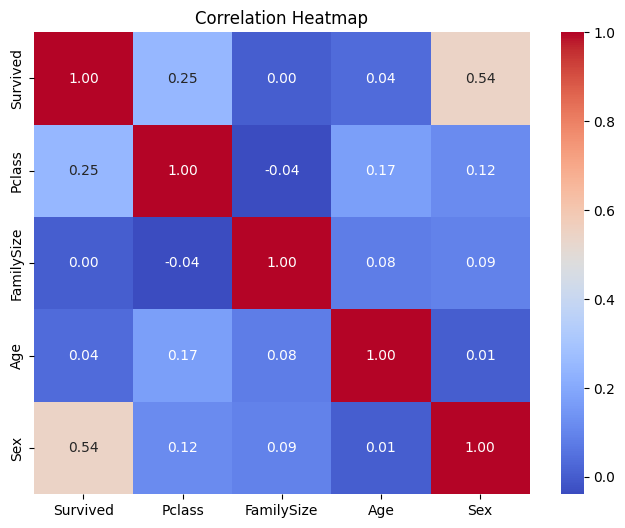

In [ ]:
# คำนวณค่าความสัมพันธ์
correlation_matrix = corr_df[['Survived', 'Pclass', 'FamilySize', 'Age', 'Sex']].apply(lambda x: pd.factorize(x)[0]).corr()

# สร้าง heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#สร้างตารางโอกาสในการเสียชีวิตและรอดชีวิตของผู้โดยสรบนเรือไททานิค

In [ ]:
titanic_with_prob=titanic.copy()

In [ ]:
titanic_with_prob.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working,1
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working,1
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working,1
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working,2
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working,1


In [ ]:
titanic_with_prob.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'AgeGroup', 'Label_age_group', 'Group_Ticket'],
      dtype='object')

In [ ]:
titanic_with_prob['Survived'] = titanic_with_prob['Survived'].map({'Survived': 1, 'Died': 0})
titanic_with_prob.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working,1


In [ ]:
import pandas as pd

# Group data by AgeGroup and calculate the probability of survival for each group
age_survival_prob = titanic_with_prob.groupby('Age')['Survived'].value_counts(normalize=True).unstack()

# Rename columns for clarity
age_survival_prob = age_survival_prob.rename(columns={0: 'Prob_Died', 1: 'Prob_Survived'})

# Reset index to make AgeGroup a column
age_survival_prob = age_survival_prob.reset_index()

# Create a mapping dictionary for the probability of survival
survival_prob_mapping = age_survival_prob.set_index('Age')['Prob_Survived'].to_dict()

# Add a new column for the survival probability based on AgeGroup
titanic_with_prob['age_survival_prob'] = titanic_with_prob['Age'].map(survival_prob_mapping)

# Display the updated DataFrame
titanic_with_prob.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket,age_survival_prob
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working,1,0.407407
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working,1,0.454545
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working,1,0.333333
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working,2,0.611111
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working,1,0.611111


In [ ]:

import pandas as pd

# Group data by IsAlone and calculate the probability of survival for each group
IsAlone_survival_prob = titanic_with_prob.groupby('IsAlone')['Survived'].value_counts(normalize=True).unstack()

# Rename columns for clarity
IsAlone_survival_prob = IsAlone_survival_prob.rename(columns={0: 'Prob_Died', 1: 'Prob_Survived'})

# Reset index to make IsAlone a column
IsAlone_survival_prob = IsAlone_survival_prob.reset_index()

# Create a mapping dictionary for the probability of survival
IsAlone_prob_mapping = IsAlone_survival_prob.set_index('IsAlone')['Prob_Survived'].to_dict()

titanic_with_prob['IsAlone_survival_prob']=titanic_with_prob['IsAlone'].map(IsAlone_prob_mapping)
titanic_with_prob.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket,age_survival_prob,IsAlone_survival_prob
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working,1,0.407407,0.505650
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working,1,0.454545,0.505650
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working,1,0.333333,0.303538
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working,2,0.611111,0.505650
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working,1,0.611111,0.303538


In [ ]:
pclass_survival_prob = titanic_with_prob.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
pclass_survival_prob = pclass_survival_prob.rename(columns={0: 'Prob_Died', 1: 'Prob_Survived'})
pclass_survival_prob = pclass_survival_prob.reset_index()
pclass_prob_mapping = pclass_survival_prob.set_index('Pclass')['Prob_Survived'].to_dict()
titanic_with_prob['pclass_survival_prob']=titanic_with_prob['Pclass'].map(pclass_prob_mapping)
titanic_with_prob.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket,age_survival_prob,IsAlone_survival_prob,pclass_survival_prob
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,Not Alone,"[20, 40)",Working,1,0.407407,0.505650,0.242363
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Not Alone,"[20, 40)",Working,1,0.454545,0.505650,0.629630
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,Alone,"[20, 40)",Working,1,0.333333,0.303538,0.242363
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Not Alone,"[20, 40)",Working,2,0.611111,0.505650,0.629630
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,Alone,"[20, 40)",Working,1,0.611111,0.303538,0.242363


In [ ]:
sex_survival_prob = titanic_with_prob.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
sex_survival_prob = sex_survival_prob.rename(columns={0: 'Prob_Died', 1: 'Prob_Survived'})
sex_survival_prob = sex_survival_prob.reset_index()
sex_survival_prob= sex_survival_prob.set_index('Sex')['Prob_Survived'].to_dict()
titanic_with_prob['sex_survival_prob']=titanic_with_prob['Sex'].map(sex_survival_prob)
titanic_with_prob.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket,age_survival_prob,IsAlone_survival_prob,pclass_survival_prob,sex_survival_prob
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,Not Alone,"[20, 40)",Working,1,0.407407,0.505650,0.242363,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,Not Alone,"[20, 40)",Working,1,0.454545,0.505650,0.629630,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,Alone,"[20, 40)",Working,1,0.333333,0.303538,0.242363,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,Not Alone,"[20, 40)",Working,2,0.611111,0.505650,0.629630,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,Alone,"[20, 40)",Working,1,0.611111,0.303538,0.242363,0.188908


In [ ]:
titanic_with_prob.to_csv('titanic_with_prob.csv',index=False)

In [ ]:
titanic_with_prob.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,IsAlone,AgeGroup,Label_age_group,Group_Ticket,age_survival_prob,IsAlone_survival_prob,pclass_survival_prob,sex_survival_prob
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,Not Alone,"[20, 40)",Working,1,0.407407,0.505650,0.242363,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,Not Alone,"[20, 40)",Working,1,0.454545,0.505650,0.629630,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,Alone,"[20, 40)",Working,1,0.333333,0.303538,0.242363,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,Not Alone,"[20, 40)",Working,2,0.611111,0.505650,0.629630,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,Alone,"[20, 40)",Working,1,0.611111,0.303538,0.242363,0.188908
